In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [9]:
df = pd.read_csv("../../our_analyses/dataset_prepared.csv")

In [10]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if x else 0)
df['genre'] = pd.factorize(df['genre'])[0]
y = np.array(df["genre"])
df = df.drop(['name', 'artists', 'album_name', 'genre'], axis=1)
X = df.values

In [11]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [15]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(X_minmax)

print('Silhouette', silhouette_score(X_minmax, dbscan.labels_))

Silhouette -0.38231608084986557


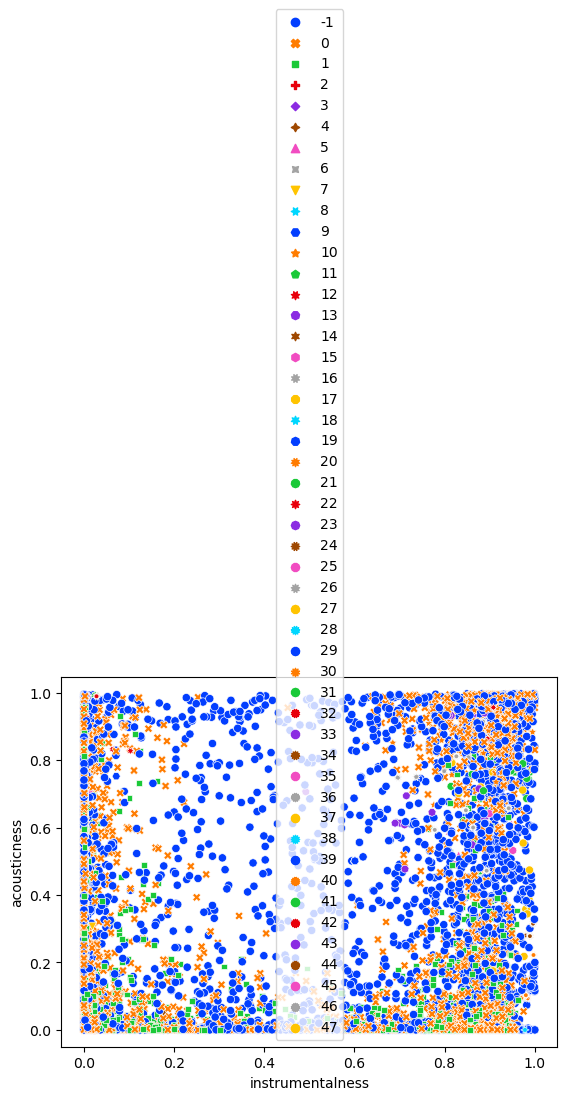

In [13]:
# sns.scatterplot(data=df, 
#                 x="instrumentalness", 
#                 y="acousticness", 
#                 hue=dbscan.labels_, 
#                 style=dbscan.labels_, 
#                 palette="bright")
# plt.show()